In [130]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib.ticker as mtick

# Reflect Tables into SQLAlchemy ORM

In [131]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import distinct

In [132]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [133]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [134]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [135]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station


In [136]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [137]:
# Find the most recent date in the data set.
mrdQuery = [r for r in session.query(measurement.date).order_by(measurement.date.desc()).first()]

most_recent_date = mrdQuery[0]

yearcalc = (datetime.strptime(most_recent_date, '%Y-%m-%d')) - timedelta(days=365)

year_ago_date = datetime.strftime(yearcalc,'%Y-%m-%d')

In [138]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
query1 = session.query(measurement.date,measurement.prcp).filter(measurement.date.between(year_ago_date, most_recent_date)).statement

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.read_sql(query1, session.bind)
df_prcp.set_index('date', inplace=True)
# Sort the dataframe by date
df_prcp.sort_values(by=['date','prcp'], inplace=True)





In [139]:
df_prcp.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


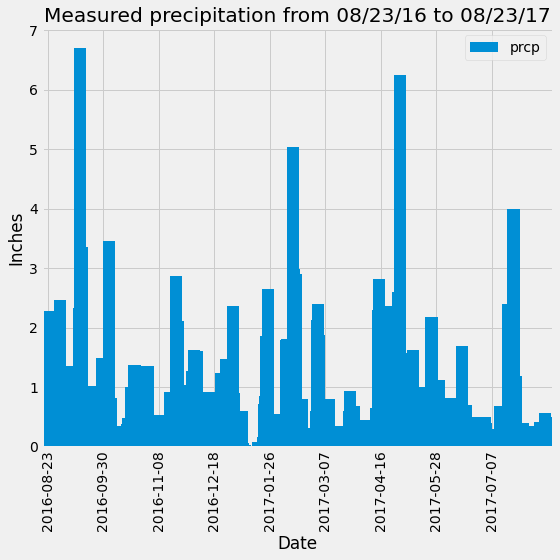

In [140]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = df_prcp.plot(kind="bar",figsize = (8,8), width=55, title="Measured precipitation from 08/23/16 to 08/23/17", xlabel="Date", ylabel="Inches")
#plt.grid()

#plt.xticks([])
plt.locator_params(axis='x', nbins=9)
plt.tight_layout()
plt.legend()



In [141]:
# Use Pandas to calcualte the summary statistics for the precipitation data

mean_prcp = df_prcp['prcp'].mean()

med_prcp = df_prcp['prcp'].median()

print(df_prcp.describe())


              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [142]:
# Design a query to calculate the total number stations in the dataset
total_num_stations = session.query(measurement.station).distinct().count()

total_num_stations


9

In [143]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
a = session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date).desc())

for e in a:
    print(e)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [144]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from scipy import stats
from numpy import mean 

temp_list = []
temp_query = session.query(measurement.tobs).filter(measurement.station=='USC00519281')
for temp in temp_query:
     temp_list.append(temp)
    



### Lowest ###
min_temp = min(temp_list)[0]
print(f"Lowest Temp: {min_temp}")

### Highest ###
max_temp = max(temp_list)[0]
print(f"Highest Temp: {max_temp}")
  

### AVG ###

avg_temp = mean(temp_list)
print(f"Average Temp {avg_temp}")



Lowest Temp: 54.0
Highest Temp: 85.0
Average Temp 71.66378066378067


In [145]:
print(temp_query.count())

2772


In [146]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query2 = session.query(measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date.between(year_ago_date, most_recent_date)).statement

df_tobs = pd.read_sql(query2, session.bind)

In [147]:
df_tobs = pd.read_sql(query2, session.bind)


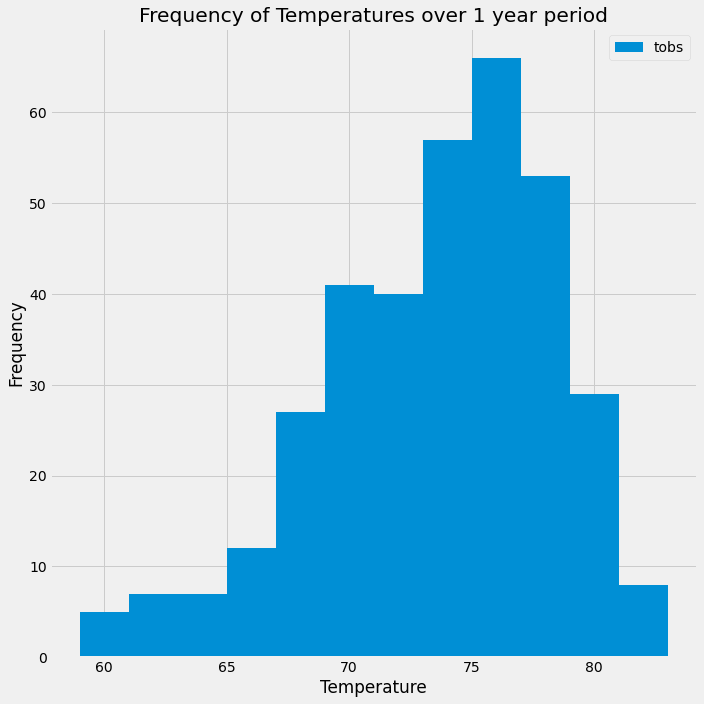

In [148]:
temp_plot = df_tobs.plot(kind='hist',figsize = (10,10),bins=12)

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Frequency of Temperatures over 1 year period")

plt.tight_layout()

# Close session

In [149]:
# Close Session
session.close()